# Glass Type prediction

## Exploratory Data Analysis (EDA)
I will now proceed to analyse the data of the file glass_data.csv

Data Dictionary of Data Set column description:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminium
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps


In [4]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
glass_df = pd.read_csv("./glass_data.csv")

### General analysis

After loading the dataset, I explore its first and last rows and check the number of rows and columns.

In [8]:
glass_df.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
glass_df.tail()

,id,ri,na,mg,al,si,k,ca,ba,fe,type
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [10]:
glass_df.shape

(214, 11)

Now I will check whether there are any missing values in the dataset.

First, I've noticed that all the values that are shown for the column "fe" are 0. I will now check if there are values that aren't.

In [12]:
glass_df["fe"].describe()

count    214.000000
mean       0.057009
std        0.097439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.100000
max        0.510000
Name: fe, dtype: float64

I can see that more than half of the rows have 0 as their value for this feature, but not all of them are.

Therefore this feature is still giving important information.

In [14]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      214 non-null    int64  
 1   ri      214 non-null    float64
 2   na      214 non-null    float64
 3   mg      214 non-null    float64
 4   al      214 non-null    float64
 5   si      214 non-null    float64
 6   k       214 non-null    float64
 7   ca      214 non-null    float64
 8   ba      214 non-null    float64
 9   fe      214 non-null    float64
 10  type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


I see no null values and all the data types are integers or float numbers. I will check for any duplicated rows now. 

In [16]:
glass_df.duplicated().sum()

0

As it's logic because of the id feature, there are no duplicated rows.

I will now drop the id column as it doesn't give any information (it just identifies the row) and check again.

In [18]:
glass_df = glass_df.drop("id", axis = 1) #Dropping the id column

In [19]:
glass_df.duplicated().sum()

1

We see that there is one duplicated observation this way. Now I'll see where it lies

In [21]:
glass_df.duplicated(keep=False)[glass_df.duplicated(keep=False)==True]

38    True
39    True
dtype: bool

In [22]:
glass_df.iloc[[38,39],] #We can see the duplicated row

,ri,na,mg,al,si,k,ca,ba,fe,type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


I'll now drop the duplicate row as it can affect the posterior Machine learning algorithm.

In [24]:
glass_df.drop(38)

,ri,na,mg,al,si,k,ca,ba,fe,type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


### Correlation

I will now proceed to do a correlation analysis:

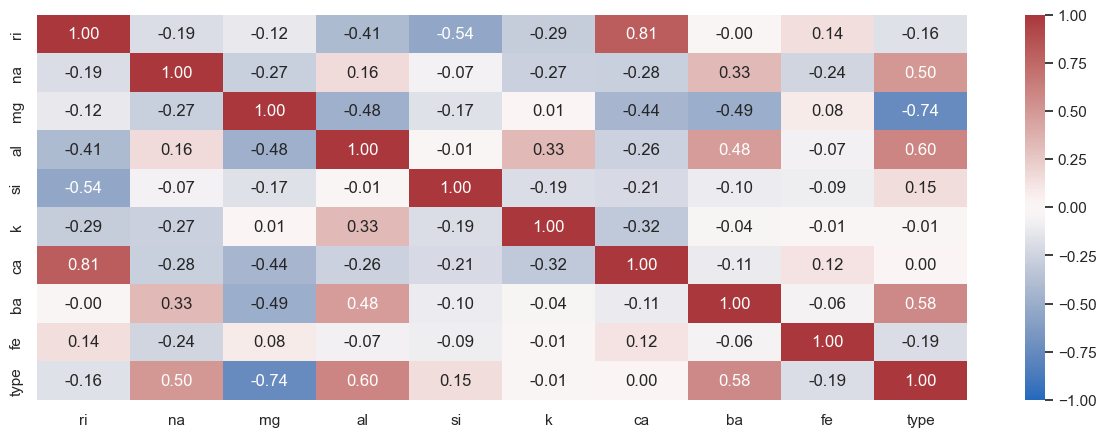

In [27]:
cor_matrix = glass_df.corr()
sns.set(rc={'figure.figsize':(15, 5)})
sns.heatmap(cor_matrix, vmin=-1, vmax=1, cmap ="vlag", annot=True, fmt = ".2f") 
plt.show()

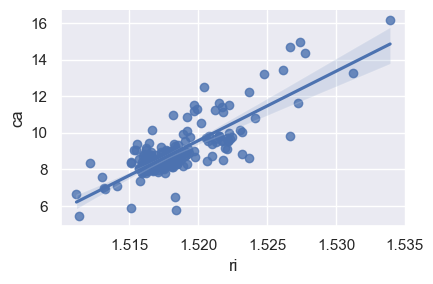

In [28]:
sns.lmplot(x='ri', y='ca', data=glass_df, height = 3, aspect = 1.5)
plt.show()

The correlation that stands out the most is ri with ca ( 0.81, represented above). This might indicate redundancy of one of the variables.

### Checking for imbalance

I'm going to check if the data is balanced. 

In [32]:
glass_df["type"].value_counts(ascending = False)

type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

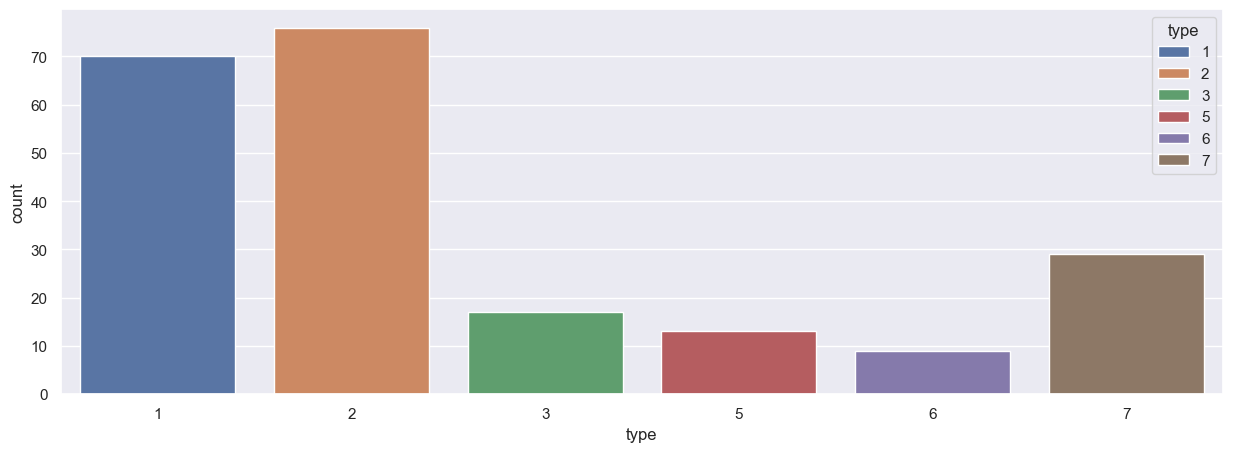

In [33]:
sns.countplot(x='type',data=glass_df,hue = "type", palette='deep')

The data is clearly imbalanced, so I will need to use resampling techniques.

### Outlier analysis

I'm going to search for outliers now. I will first show a boxplot with the scaled data to facilitate seeing the outliers.

In [37]:
scaler = StandardScaler()
scaled = scaler.fit_transform(glass_df)

<Axes: >

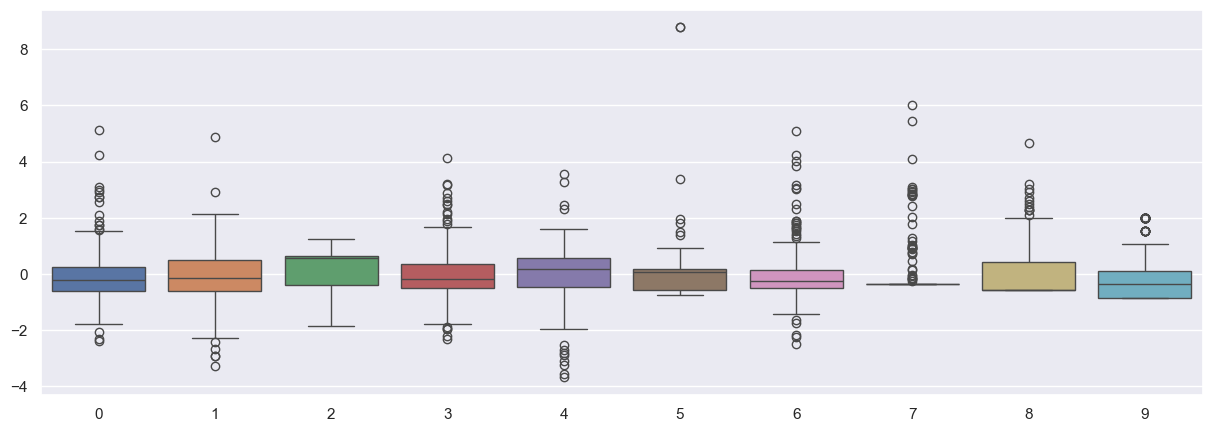

In [38]:
sns.boxplot(data=scaled)

It can be seen that there are some outliers for most of the features. However, the dataset is a very small dataset ( 214 rows ), and it has 6 different types, which means there is not enough data to know whether these outliers are real outliers. Therefore I will assume these outliers represent natural variations in the population and won't handle them.

### Dataset distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


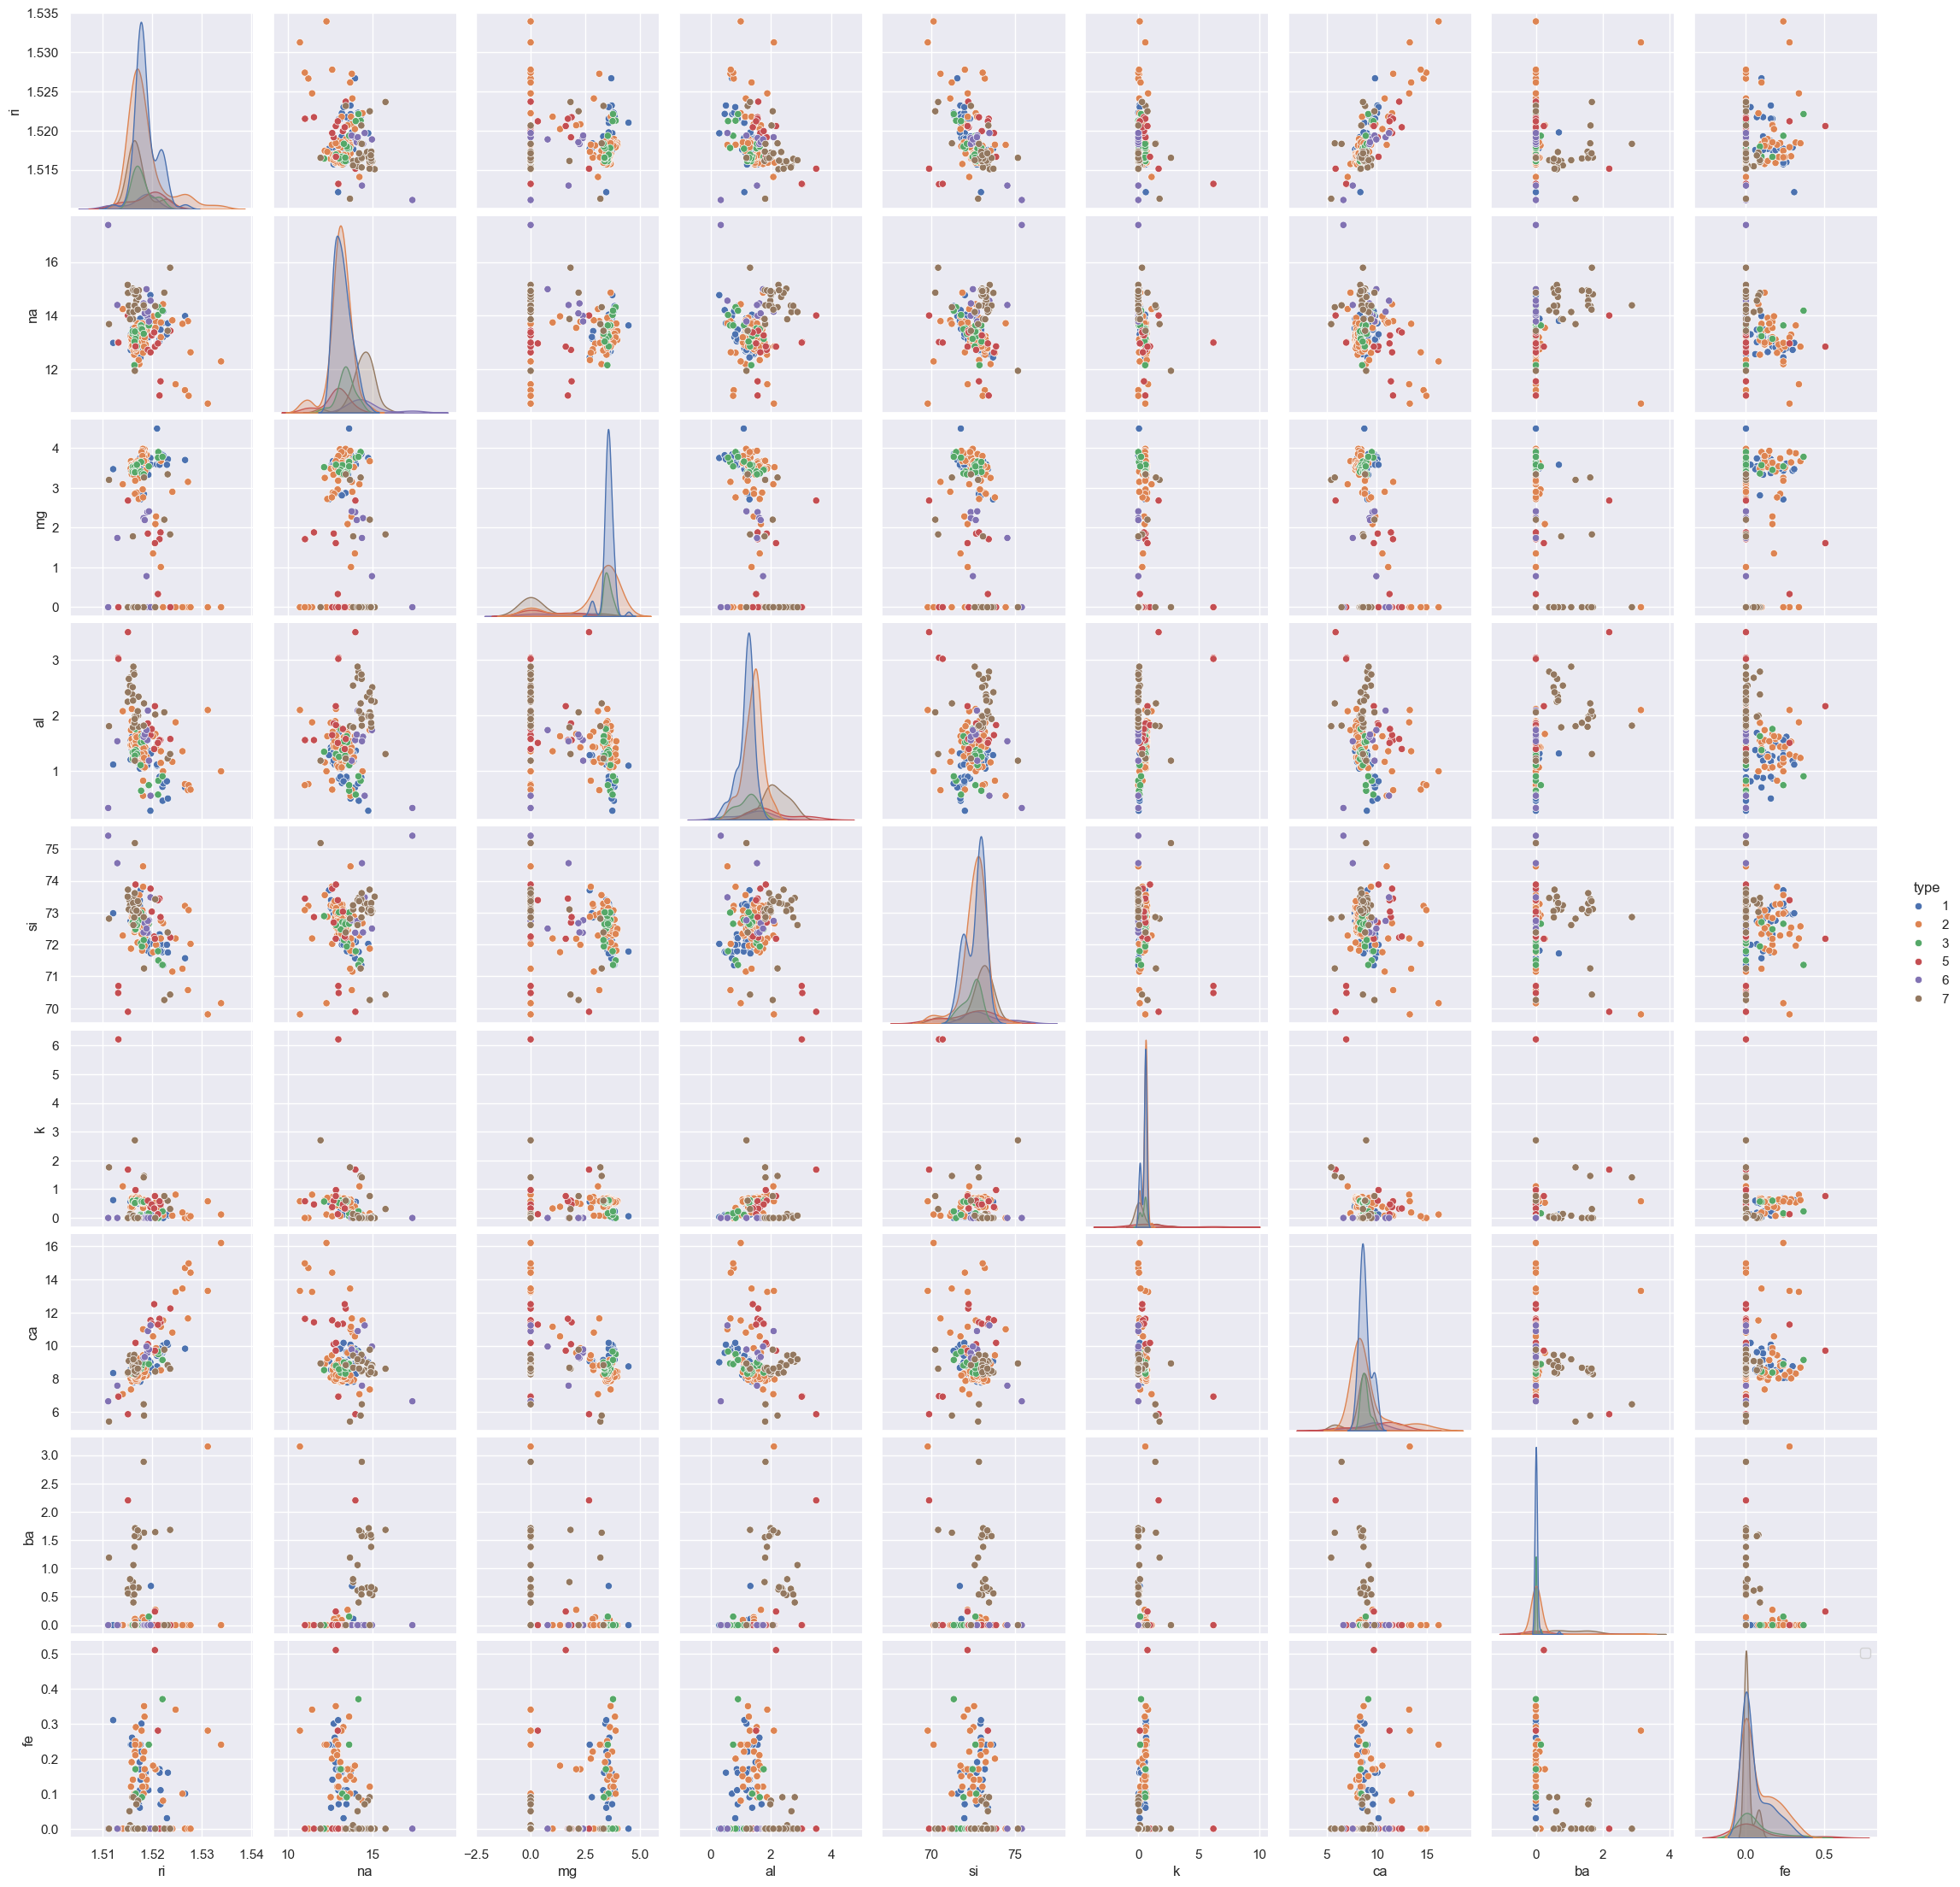

In [41]:
sns.pairplot(glass_df,hue='type', palette = "deep")
plt.legend()
plt.show()

I can see that most of the variables are skewed, while some of them are following normal distribution. Also a diagonal line can be seen between ri and ca and between si and ri . This indicates some correlation between the variables, as shown before.

Also it can be seen that some variables show good separation of some types ( for example, mg seems to separate the 5th fairly well), but multiple variables will be needed.

### One hot encoding

In [44]:
glass_df = pd.concat([glass_df,pd.get_dummies(glass_df["type"], prefix = "Type")], axis = 1) #One hot encoding of target variable

In [45]:
#To finish with the pre-processing, I will drop the previous type feature.
glass_df = glass_df.drop ("type", axis = 1) #drop previous target variable

In [50]:
glass_df.head(3)

,ri,na,mg,al,si,k,ca,ba,fe,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,True,False,False,False,False,False
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,True,False,False,False,False,False
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,True,False,False,False,False,False


# ML algorithm training 

### Divide dataset into target variable and the predictor variables

In [54]:
x = glass_df.drop(["Type_1", "Type_2", "Type_3", "Type_5", "Type_6", "Type_7"], axis = 1)
y = glass_df.loc[:,["Type_1", "Type_2", "Type_3", "Type_5", "Type_6", "Type_7"]]

Because the dataset is very limited, I will use a split 90% Training 10% Test. 
Also I use stratify so that the distribution is maintained.

In [60]:
# Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(x)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1,  random_state = 42, stratify = y) 